# EDA & Data Cleaning Notebook
This notebook focuses on initial data loading, quality checks, cleaning, and exploratory analysis for wage prediction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

## Load Dataset
Update the path/filename below to match your actual data source.

In [2]:
data_path = 'data/wage_data.csv'
df = pd.read_csv(data_path)
df.head()

,age,education_years,education_level,occupation,industry,hours_per_week,wage
0,25,16,Bachelors,Data Analyst,Technology,40,58000
1,31,18,Masters,Software Engineer,Technology,45,92000
2,42,12,High School,Machine Operator,Manufacturing,50,47000
3,37,14,Associate,Nurse,Healthcare,36,76000
4,29,16,Bachelors,Financial Analyst,Finance,42,81000


In [3]:
print('Shape:', df.shape)
display(df.info())
display(df.describe(include='all').T.head(20))

Shape: (10, 7)
<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              10 non-null     int64
 1   education_years  10 non-null     int64
 2   education_level  10 non-null     str  
 3   occupation       10 non-null     str  
 4   industry         10 non-null     str  
 5   hours_per_week   10 non-null     int64
 6   wage             10 non-null     int64
dtypes: int64(4), str(3)
memory usage: 692.0 bytes


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,10.0,NaN,NaN,NaN,36.3,9.153627,25.0,29.5,35.0,41.25,54.0
education_years,10.0,NaN,NaN,NaN,15.2,2.973961,10.0,13.25,16.0,16.75,20.0
education_level,10,7,Bachelors,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,10,10,Data Analyst,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,10,8,Technology,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_per_week,10.0,NaN,NaN,NaN,43.1,4.280446,36.0,40.0,43.0,45.75,50.0
wage,10.0,NaN,NaN,NaN,74000.0,20981.473309,47000.0,59000.0,70000.0,89250.0,110000.0


In [8]:
missing_summary = df.isna().mean().sort_values(ascending=False)
duplicates = df.duplicated().sum()
print('Duplicate rows:', duplicates)
missing_summary.head(20)

Duplicate rows: 0


age                0.0
education_years    0.0
education_level    0.0
occupation         0.0
industry           0.0
hours_per_week     0.0
wage               0.0
dtype: float64

In [12]:
# Basic cleaning template
df = df.drop_duplicates().copy()

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown')

print('Cleaned shape:', df.shape)

Cleaned shape: (10, 7)


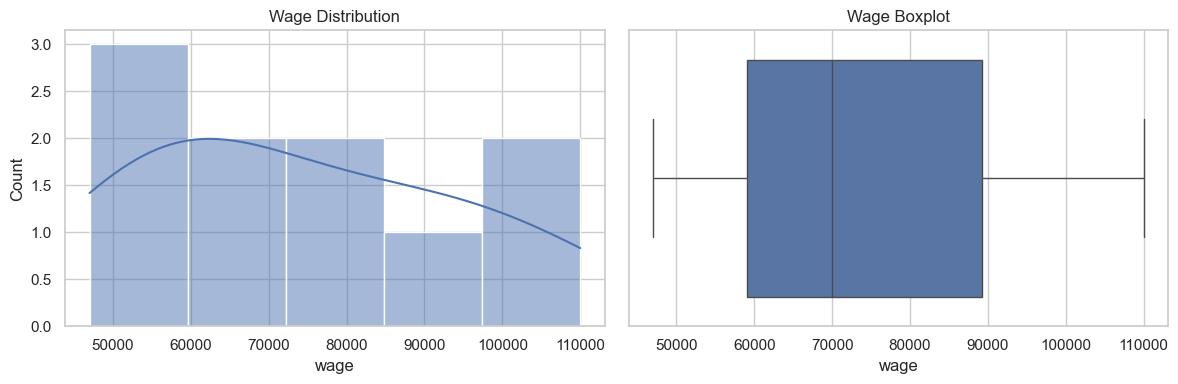

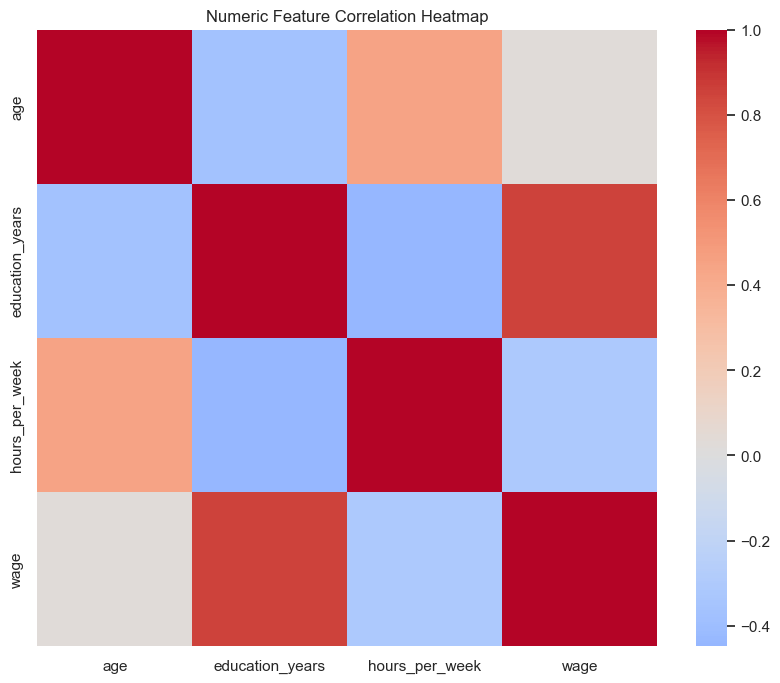

In [15]:
# Example EDA visuals
target_col = 'wage'

if target_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[target_col], kde=True, ax=axes[0])
    axes[0].set_title('Wage Distribution')

    sns.boxplot(x=df[target_col], ax=axes[1])
    axes[1].set_title('Wage Boxplot')
    plt.tight_layout()

corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

In [17]:
# Save cleaned dataset for downstream notebooks
output_path = 'data/cleaned_wage_data.csv'
df.to_csv(output_path, index=False)
print(f'Saved cleaned data to {output_path}')

Saved cleaned data to data/cleaned_wage_data.csv
